# Chapter 10 : Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

## Recipes
* [10.1 Understanding the difference between Python and pandas date tools](#10.1-Understanding-the-difference-between-Python-and-pandas-date-tools)
* [10.2 Slicing time series intelligently](#10.2-Slicing-time-series-intelligently)
* [10.3 Using methods that only work with a DatetimeIndex](#10.3-Using-methods-that-only-work-with-a-DatetimeIndex)
* [10.4 Counting the number of weekly crimes](#10.4-Counting-the-number-of-weekly-crimes)
* [10.5 Aggregating weekly crime and traffic separately](#10.5-Aggregating-weekly-crime-and-traffic-separately)
* [10.6 Measuring crime by weekday and year](#10.6-Measuring-crime-by-weekday-and-year)
* [10.7 Grouping with anonymous functions with a DatetimeIndex](#10.7-Grouping-with-anonymous-functions-with-a-DatetimeIndex)
* [10.8 Grouping by a DatetimeIndex and another column](#10.8-Grouping-by-a-DatetimeIndex-and-another-column)
* [10.9 Finding the last time crime was 20% lower with merge_asof](#10.9-Finding-the-last-time-crime-was-20%-lower-with-merge_asof)

# 10.1 Understanding the difference between Python and pandas date tools

In [2]:
### [Tech] python datetime.date, time, datetime, timedelta
###        pandas Timestamp, Timedelta , (Period)
### [Goal] 시간 객체, 함수 살펴보기

## >> How to do it...

In [3]:
# 10.1.1  파이썬의 시간 객체에 대해서 살펴본다.
#   datetime 모듈에는 date, time, datetime 형태로 
#   각각  일자, 시간, 일시 형태의 데이터를 다룬다. 

import datetime

date = datetime.date(year=2013, month=6, day=7)
time = datetime.time(hour=12, minute=30, second=19, microsecond=463198)
dt = datetime.datetime(year=2013, month=6, day=7, 
                       hour=12, minute=30, second=19, microsecond=463198)

print("date is ", date)
print("time is", time)
print("datetime is", dt)

date is  2013-06-07
time is 12:30:19.463198
datetime is 2013-06-07 12:30:19.463198


In [4]:
# 10.1.2  시간간의 간격에 대해서는 timedelta 라는 데이터 형을 제공한다.
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, 
                        seconds=6.73, milliseconds=99, microseconds=8)
print(td)
# second = 1, 000 millisecond = 1,000,000 microsecond

19 days, 10:20:06.829008


In [5]:
# 10.1.3 10.1.1의 시간에 10.1.2의 시간 간격 timedelta를 더해 본다. 
print('new date is', date + td)
print('new datetime is', dt + td)

new date is 2013-06-26
new datetime is 2013-06-26 22:50:26.292206


In [6]:
# 10.1.4 time 객체는 timedelta와의 연산이 불가능하다. 
time + td

TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.timedelta'

In [7]:
#10.1.5 pandas의 Timestamp를 살펴본다. 
# 연월시분초, 마이크로초 까지를 지정하여 Timestamp를 생성한다. 
pd.Timestamp(year=2012, month=12, day=21, hour=5, minute=10, second=8, microsecond=99)

Timestamp('2012-12-21 05:10:08.000099')

In [8]:
# 연월시만 지정할 수 있다.
pd.Timestamp('2016/1/10')

Timestamp('2016-01-10 00:00:00')

In [9]:
# 다양한 형태로 연월시를 제공이 가능하다. 
pd.Timestamp('2014-5/10')

Timestamp('2014-05-10 00:00:00')

In [10]:
# 다양한 형태로 연월시를 제공이 가능하다.  (문서형)
pd.Timestamp('Jan 3, 2019 20:45.56')

Timestamp('2019-01-03 20:45:33')

In [11]:
# 다양한 형태로 연월시를 제공이 가능하다.  (시스템형)
pd.Timestamp('2016-01-05T05:34:43.123456789')

Timestamp('2016-01-05 05:34:43.123456789')

In [12]:
# 10.1.6 Timestamp는 시작 시점을 갖고 있다. 1970년 1월 1일 0시 0분.  
#       숫자만 지정시, 시작시점에 나노초로 환산하여 시간을 구한다. 
pd.Timestamp(500)

Timestamp('1970-01-01 00:00:00.000000500')

In [13]:
# 더하는 단위를 unit 매개변수로 지정할 수 있다. 
# unit = 'D' 지정으로 71년 1월 1일 부터 5000일째 날자를 반환한다. 
pd.Timestamp(5000, unit='D')

Timestamp('1983-09-10 00:00:00')

In [14]:
# 10.1.7  pandas의 to_datetime() 함수는 pd.Timestamp와 유사하게 시간형 데이터를 생성하지만
#         매개변수를 통해 추가적인 기능 수행이 가능하다. 
pd.to_datetime('2015-5-13')

Timestamp('2015-05-13 00:00:00')

In [15]:
# 데이터 포맷을 지정한다. dayfirst= True는  연-일-월 형태로 데이터를 읽어 들인다. 
pd.to_datetime('2015-13-5', dayfirst=True)

Timestamp('2015-05-13 00:00:00')

In [16]:
# 매개변수 format을 통해 시간 정보를 지정
pd.to_datetime('Start Date : Sep 30, 2017 Start Time : 1:30 pm',
              format = 'Start Date : %b %d, %Y Start Time : %I:%M %p' )

Timestamp('2017-09-30 13:30:00')

In [17]:
# 날자 계산식을 통한 시간 정보 지정
pd.to_datetime(100, unit = 'D', origin = '2013-1-1')

Timestamp('2013-04-11 00:00:00')

In [18]:
# 10.1.8 pd.to_datetime은 Series를 인수로 받아 변환 할 수 있다. 
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [19]:
s = pd.Series(['12-5-2015', '14-1-2013', '20/12/2017', '40/23/2017'])
pd.to_datetime(s, dayfirst=True, errors='coerce')
# 마지막 NaT에 주목한다. Not a Time , errors='coerce' 로 지정했기 때문에 강제 변환 수행

0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

In [20]:
# list의 값을 처리할 수 있다. 
# 이 때의 반환 값은 DatetimeIndex가 되고, 각 항목의 dtype은 datetime64로 되어 있다. 
pd.to_datetime(['Aug 3 1999 3:45:56', '10/31/2017'])

DatetimeIndex(['1999-08-03 03:45:56', '2017-10-31 00:00:00'], dtype='datetime64[ns]', freq=None)

In [21]:
# 10.1.9 pd.Timedelta는 시간 간격을 나타내고, pd.to_timedelta() 함수를 이용해서 
#       그 값을 지정할 수 있다. 
#      (pd.Timestamp와 pd.to_datetime() 과 유사)

# 문장 유형으로 지정된 값을 인지한다. 
pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds')

Timedelta('12 days 05:03:00.123456')

In [22]:
# 매개변수에 각 값을 전달 할 수도 있다. 
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [23]:
#  unit ='W'를 통해 주 단위로 값을 지정하면 입력받은 값을 일단위로 환산 하여 값을 갖는다. 
pd.Timedelta(100, unit='W')

Timedelta('700 days 00:00:00')

In [24]:
# 해석이 불가능한 값의 경우, errors = 'ignore' 로 되면, 오류 경고 없이 지나친다. 
pd.to_timedelta('5 dayz', errors = 'ignore')

'5 dayz'

In [25]:
# 24 시간 보다 큰 값이 시 자리에 들어오면 일자로 환산한다. 
pd.to_timedelta('67:15:45.454')

Timedelta('2 days 19:15:45.454000')

In [26]:
# Series에 대해서도 작동한다. 
s = pd.Series([10, 100])
pd.to_timedelta(s, unit='s')

0   00:00:10
1   00:01:40
dtype: timedelta64[ns]

In [27]:
# list에 대해서 작동한다. 
# 결과 리스트는 TimedeltaIndex가 되며, 값의 dtype은 timedelta64가 된다. 
time_strings = ['2 days 24 minutes 89.67 seconds', '00:45:23.6']
pd.to_timedelta(time_strings)

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

In [28]:
# 10.1.10  pd.Timedelta는 scala 또는 pd.Timestamp와 연산이 가능하다. 

# scala와의 연산
pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timedelta('24 days 10:06:00')

In [29]:
# Timestamp, Timedelta, scala의 연산
pd.Timestamp('1/1/2017') + pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timestamp('2017-01-25 10:06:00')

In [30]:
# Timedelta의 자료구조간 연산도 가능하다.  
td1 = pd.to_timedelta([10, 100], unit='s')
td2 = pd.to_timedelta(['3 hours', '4 hours'])
td1 + td2

TimedeltaIndex(['03:00:10', '04:01:40'], dtype='timedelta64[ns]', freq=None)

In [31]:
#  Timedelta / Timedelta 는 scala를 반환한다.  (같은 단위의 나눗셈은 단위를 없엔다)
pd.Timedelta('12 days') / pd.Timedelta('3 days')

4.0

In [32]:
# 10.1.11 Timestamp와 Timedelta의 attribute와 method를 살펴본다.

ts = pd.Timestamp('2016-10-1 4:23:23.9')

In [33]:
# ceil  올림 . 매개변수로 지정된 문자패턴에 맞추어 올림 수행
ts.ceil('h')

Timestamp('2016-10-01 05:00:00')

In [34]:
# 연월일시분초 의 attribute 
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2016, 10, 1, 4, 23, 23)

In [35]:
#  요일, 연중 몇일째, 캘린더 날자 등의 속성도 있다. 
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(5, 275, 31)

In [36]:
# python datetime.datetime 형으로 변환
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23, 900000)

In [37]:
# 지정한 단위와 값을  일시분초로 변환
td = pd.Timedelta(125.8723, unit='h')
td

Timedelta('5 days 05:52:20.280000')

In [38]:
# 분단위 반올림
td.round('min')

Timedelta('5 days 05:52:00')

In [39]:
# Timedelta의 기본 매개 변수들, 일시분초 밀리 마이크로 나노
td.components

Components(days=5, hours=5, minutes=52, seconds=20, milliseconds=280, microseconds=0, nanoseconds=0)

In [40]:
# Timedelta 값을 초로 환산
td.total_seconds()

453140.28

## >> There's more... 10.1

In [41]:
# 통상 유연한은 성능을 희생한다. 

date_string_list = ['1984-9-5'] * 10000

In [42]:
%timeit pd.to_datetime(date_string_list)

5 ms ± 753 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
%timeit pd.to_datetime(date_string_list, format='%Y-%m-%d')

4.56 ms ± 576 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 10.2 Slicing time series intelligently

In [44]:
### [Tech] DatetimeIndex (dtype = np.datetime64) 인덱스의 인덱싱, 슬라이싱
###        날자형 고유의 유연한 처리 가능 (부분 시간 지정 등)
### [Goal] crime에서 다양한 범위의 데이터를 추출해 본다. 
### [Data] 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format)

## >> How to do it...

In [45]:
# pd.DatetimeIndex는 pd.Index의 subset이다. 
issubclass( pd.DatetimeIndex, pd.Index)

True

In [46]:
# 10.2.1 덴버시의 범죄 정보 cremes.h5 (HDF : Hierarchical Data Format) 으로 부터 읽어들여
#       crime에 저장한다. 
crime = pd.read_hdf('data/crime.h5', 'crime')

# 범죄유형, 보고일자, 위치, 지명, 범죄여부, 교통사고 여부 등의 데이터를 갖고 있으며
#  처음 읽어 들일 때부터, 범주형 데이터는 category로 처리 되어 있다. 
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [47]:
# 46만여건의 정보를 다룬다. 
# 위치 정보가 일부 누락이 있다. 
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460911 entries, 0 to 460910
Data columns (total 8 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
REPORTED_DATE          460911 non-null datetime64[ns]
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int64
IS_TRAFFIC             460911 non-null int64
dtypes: category(3), datetime64[ns](1), float64(2), int64(2)
memory usage: 22.9 MB


In [48]:
# 수치형 정보의 요약 통계
crime.describe()

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
count,457296.000000,457296.000000,460911.000000,460911.000000
mean,-104.949973,39.726061,0.728668,0.271855
std,1.243537,0.471636,0.444648,0.444916
min,-105.300593,0.000001,0.000000,0.000000
25%,-105.009524,39.706890,0.000000,0.000000
50%,-104.982722,39.739285,1.000000,0.000000
75%,-104.929727,39.757689,1.000000,1.000000
max,-0.000002,39.904311,1.000000,1.000000


In [49]:
# 카테고리형/일자형 정보의 요약 통계
crime.describe(include = ['category', np.datetime64])

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,NEIGHBORHOOD_ID
count,460911,460911,460911,460911
unique,196,15,390969,78
top,traffic-accident,traffic-accident,2017-02-13 09:00:00,five-points
freq,87420,125060,9,23466
first,NaN,NaN,2012-01-02 00:06:00,NaN
last,NaN,NaN,2017-09-29 06:16:00,NaN


In [50]:
# 인덱스 범위 : 2012년 1월 2일  부터 2017년 9월 29일 까지 
crime.index.min(),crime.index.max()

(0, 460910)

In [51]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [52]:
# 10.2.2 날자정보를 인덱스로 지정한다. 
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [53]:
# 인덱스는  날자 형임을 인지한 DatetimeIndex로 생성된다. 
crime.index

DatetimeIndex(['2014-06-29 02:01:00', '2014-06-29 01:54:00',
               '2014-06-29 02:00:00', '2014-06-29 02:18:00',
               '2014-06-29 04:17:00', '2014-06-29 04:22:00',
               '2014-06-29 02:56:00', '2014-06-29 04:54:00',
               '2014-01-20 08:29:00', '2014-06-29 03:56:00',
               ...
               '2017-09-12 13:40:00', '2017-09-12 18:13:00',
               '2017-09-13 01:12:00', '2017-09-12 15:33:00',
               '2017-09-12 14:00:00', '2017-09-13 05:48:00',
               '2017-09-12 20:37:00', '2017-09-12 16:32:00',
               '2017-09-12 13:04:00', '2017-09-12 09:30:00'],
              dtype='datetime64[ns]', name='REPORTED_DATE', length=460911, freq=None)

In [54]:
# 10.2.3 시간 정보 전체를 .loc 인덱서에 레이블로 입력하면, 정확히 그 값이 출력된다. 
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [55]:
# 10.2.4 일자만 입력하면 해당 일자에 일치 하는 데이터를 추출한다. 
crime.loc['2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,-104.929350,39.763797,northeast-park-hill,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...
2016-05-12 17:55:00,public-peace-other,public-disorder,-105.027747,39.700029,westwood,1,0
2016-05-12 19:24:00,threats-to-injure,public-disorder,-104.947118,39.763777,clayton,1,0
2016-05-12 22:28:00,sex-aslt-rape,sexual-assault,NaN,NaN,harvey-park-south,1,0


In [56]:
# 10.2.5 월, 연도, 시간 등 원하는 부분까지만 출력할 수 있다. 
# 연월
crime.loc['2016-05'].shape

(8012, 7)

In [57]:
# 연도
crime.loc['2016'].shape

(91076, 7)

In [58]:
# 연월일시
crime.loc['2016-05-12 03'].shape

(4, 7)

In [59]:
# 10.2.6 월 이름 (영문)으로 추출도 가능하다.
crime.loc['Dec 2015'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:35:00,drug-cocaine-possess,drug-alcohol,-104.988019,39.753420,five-points,1,0
2015-12-31 23:40:00,traffic-accident,traffic-accident,-104.945076,39.736768,congress-park,0,1
2015-12-31 23:44:00,drug-cocaine-possess,drug-alcohol,-104.966814,39.746460,city-park-west,1,0


In [60]:
# 10.2.7 조금 복잡한 패턴도 처리 할 수 있는 경우가 많다. 
crime.loc['2016 Sep, 15'].shape

(252, 7)

In [61]:
crime.loc['21st October 2014 05'].shape

(4, 7)

In [62]:
crime['21st October 2014 05']  # .loc 없이도 동작한다. 

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-10-21 05:19:00,traf-other,all-other-crimes,-105.006459,39.769287,highland,1,0
2014-10-21 05:11:00,criminal-trespassing,all-other-crimes,-104.962105,39.676030,university,1,0
2014-10-21 05:47:00,harassment-dv,public-disorder,-104.765032,39.801407,dia,1,0
2014-10-21 05:00:00,criminal-mischief-mtr-veh,public-disorder,-105.020969,39.756938,jefferson-park,1,0


In [63]:
# 10.2.8 슬라이싱도 잘 처리 한다. 
crime.loc['2015-3-4':'2016-1-1'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of-services,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,-104.987454,39.701378,washington-park-west,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,-105.010843,39.762538,highland,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:15:00,traffic-accident-hit-and-run,traffic-accident,-104.996861,39.738612,civic-center,0,1
2016-01-01 23:16:00,traffic-accident,traffic-accident,-105.025088,39.707590,westwood,0,1
2016-01-01 23:40:00,robbery-business,robbery,-105.039236,39.726157,villa-park,1,0


In [64]:
# 10.2.9  레이블의 슬라이싱은 자기 자신을 포함한다. 
crime.loc['2015-3-4 22':'2016-1-1 23:45:00'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 22:25:00,traffic-accident-hit-and-run,traffic-accident,-104.973896,39.769064,five-points,0,1
2015-03-04 22:30:00,traffic-accident,traffic-accident,-104.906412,39.632816,hampden-south,0,1
2015-03-04 22:32:00,traffic-accident-hit-and-run,traffic-accident,-104.979180,39.706613,washington-park-west,0,1
2015-03-04 22:33:00,traffic-accident-hit-and-run,traffic-accident,-104.991655,39.740067,civic-center,0,1
2015-03-04 22:36:00,theft-unauth-use-of-ftd,white-collar-crime,-105.045235,39.667928,harvey-park,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:07:00,traf-other,all-other-crimes,-104.980400,39.740144,north-capitol-hill,1,0
2016-01-01 23:15:00,traffic-accident-hit-and-run,traffic-accident,-104.996861,39.738612,civic-center,0,1
2016-01-01 23:16:00,traffic-accident,traffic-accident,-105.025088,39.707590,westwood,0,1


## >> How it works... 10.2

In [65]:
# category 형을 사용하여 메모리 사용량을 절감하였다. 
# 문자 object 형이 였으면 4배 데이터 더 사용했다.  
mem_cat = crime.memory_usage().sum()
mem_obj = crime.astype({'OFFENSE_TYPE_ID':'object', 
                        'OFFENSE_CATEGORY_ID':'object', 
                        'NEIGHBORHOOD_ID':'object'}).memory_usage(deep=True)\
                                                    .sum()
mb = 2 ** 20
round(mem_cat / mb, 1), round(mem_obj / mb, 1)

(29.4, 122.7)

In [66]:
# 인덱스 형태의 확인
crime.index[:2]

DatetimeIndex(['2014-06-29 02:01:00', '2014-06-29 01:54:00'], dtype='datetime64[ns]', name='REPORTED_DATE', freq=None)

## >> There's more... 10.2

In [67]:
# crime의 인덱스는 정렬되지 않았지만, 날자에 대해서 slice를 적용 할 수 있었다. 

crime.index.is_monotonic

False

In [68]:
%timeit crime.loc['2015-3-4':'2016-1-1']

10.7 ms ± 547 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [69]:
# 정렬 후 적용 하면 성능이 개선 된다. 
crime_sort = crime.sort_index()
crime_sort.index.is_monotonic

True

In [70]:
%timeit crime_sort.loc['2015-3-4':'2016-1-1']

1.39 ms ± 72.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# 10.3 Using methods that only work with a DatetimeIndex

In [71]:
### [Tech] DataFrame, Series의 인덱스가 DatetimeIndex인 경우에만 사용가능한  method
###        df.between_time(), df.at_time(), df.first(pd.offsets.  )
### [Goal] 특정 시간대의 정보 추출, 또는 특정 일시 오프셋의 활용법을 익힌다. 
### [Data] 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format)

## >> How to do it...

In [72]:
# 10.3.1 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format) 으로 부터 
#       REPORT_DATE를  DatetimeIndex로 하여 읽어들여 crime에 저장한다.  
crime = pd.read_hdf('data/crime.h5', 'crime').set_index('REPORTED_DATE')
print(type(crime.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [73]:
# 10.3.2 df.between_time  - 모든 날자의 시간대를 지정하여 추출
crime.between_time('2:00', '5:00', include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


In [74]:
# 10.3.3  df.at_time - 모든 날자의 특정 시간 데이터
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0


In [75]:
# 10.3.4  df.first - 앞에서 부터 주어진 오프셋 만큼의 까지 해당하는 데이터 추출
#             매개변수는 오프셋 형태로 전달, 
#             인덱스가 정렬된 상태에서만 사용가능 
crime_sort = crime.sort_index()

# 정확히 1월부터 6월말까지의 정보를 추출해보자.

In [76]:
# 첫 데이터 (iloc[0]) 에서 6번째만에 나타나는 월초 데이터 
# 1월 2일이 첫 데이터니까, 2월초, 3월초, 4월초, 5월초 , 6월초 , 7월초 가 됨
crime_sort.first(pd.offsets.MonthBegin(6)).tail(3)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1
2012-07-01 00:01:00,robbery-street,robbery,-104.924292,39.767585,northeast-park-hill,1,0


In [77]:
# 10.3.5 비슷한 MonthEnd로 전달하면 6번째 나타나는 월말까지의 데이터 
# 1월 2일이 첫 데이터니까  1월말 2월말, 3월말, 4월말, 5월말 , 6월말 이 됨. 
# 문제는 6월 말에 해당하는 6월 30일 데이터를 한 줄만 가지고 온다는 점이다. 
crime_sort.first(pd.offsets.MonthEnd(6)).tail(3)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-06-29 23:41:00,robbery-street,robbery,-104.991912,39.756163,five-points,1,0
2012-06-29 23:57:00,assault-simple,other-crimes-against-persons,-104.987360,39.715162,speer,1,0
2012-06-30 00:04:00,traffic-accident,traffic-accident,-104.894697,39.628902,hampden-south,0,1


In [78]:
# 10.3.6
# 의도와 다르게 움직이는 현상은 첫  번 째 데이터의 시간 중 00:06:00 의 6분에 기인한다.
# MonthBegin을 00분에서 끊지 못하고 시간 6분 만큼을 추가 반영한 것이다. 
# 이 문제를 해결하기 위해서 normalize = True 를 주면 6분이 오프셋에 추가 되는 것을 방지한다. 
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True)).tail(3)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1


In [79]:
# 10.3.7 같은 데이터를 추출하기 위해 슬라이스로 표기하면 아래와 같다. 
crime_sort.loc[:'2012-06']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1


In [80]:
# 10.3.8  pd.offsets. 객체를 편하게 사용하기 위해서  offset alias라는 문자열을 사용할 수 있다.
#        각 문자열 앞에 숫자를 적어주면 해당 숫자 만큼 오프셋이 이동한다. 
#        'D' : 일자 , 'B' : 영업일 , 'W': 주, 'Q' : 분기, 'QS' : 분기 시작, 'A': 연말
# 5 일 
crime_sort.first('5D')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-06 23:11:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.999752,39.726081,lincoln-park,1,0
2012-01-06 23:23:00,violation-of-restraining-order,all-other-crimes,-104.969588,39.681135,university,1,0
2012-01-06 23:30:00,assault-dv,other-crimes-against-persons,-104.958983,39.674135,university-park,1,0


In [81]:
# 5 영업일
crime_sort.first('5B')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-08 23:46:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.991384,39.753888,five-points,1,0
2012-01-08 23:51:00,burglary-residence-no-force,burglary,-105.031781,39.747420,sloan-lake,1,0
2012-01-08 23:52:00,theft-other,larceny,-104.968227,39.739752,cheesman-park,1,0


In [82]:
# 7주
crime_sort.first('7W')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-02-18 21:57:00,traffic-accident,traffic-accident,-104.974663,39.744041,north-capitol-hill,0,1
2012-02-18 22:19:00,criminal-mischief-graffiti,public-disorder,-104.957558,39.766129,clayton,1,0
2012-02-18 22:20:00,traffic-accident-dui-duid,traffic-accident,-104.919946,39.761917,north-park-hill,0,1


In [83]:
# 3분기 시작
crime_sort.first('3QS')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-09-30 23:17:00,drug-hallucinogen-possess,drug-alcohol,-105.022715,39.678579,college-view-south-platte,1,0
2012-09-30 23:29:00,robbery-street,robbery,-104.977522,39.781310,globeville,1,0
2012-09-30 23:29:00,theft-of-motor-vehicle,auto-theft,-104.988838,39.686925,overland,1,0


In [84]:
# 연말
crime_sort.first('A')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-12-30 23:13:00,traffic-accident,traffic-accident,-104.973097,39.740032,capitol-hill,0,1
2012-12-30 23:14:00,burglary-residence-no-force,burglary,-104.960898,39.697153,washington-park,1,0
2012-12-30 23:39:00,theft-of-motor-vehicle,auto-theft,-105.002180,39.769714,sunnyside,1,0


## >> How it works... 10.3

In [85]:
#  10.3.2의 특정시간대 추출을 python 표준라이브러리의 time 객체로 시간을 지정할 수 있다. 
import datetime
crime.between_time(datetime.time(2,0), datetime.time(5,0), include_end=False)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


In [86]:
# 10.3.4~6의 오프셋을 명확하게 이해하기 위한 실험

first_date = crime_sort.index[0] # iloc[0] 에 해당하는 인덱스 값
first_date

Timestamp('2012-01-02 00:06:00')

In [87]:
first_date + pd.offsets.MonthBegin(6)  # 월초 오프셋을 더하면 6분이 포함된다. 

Timestamp('2012-07-01 00:06:00')

In [88]:
first_date + pd.offsets.MonthEnd(6)    # 월말 오프셋을 더해도 6분이 포함된다.

Timestamp('2012-06-30 00:06:00')

In [89]:
step4 = crime_sort.first(pd.offsets.MonthBegin(6))   # 10.3.4의 결과 27,489 rows
end_dt = crime_sort.index[0] + pd.offsets.MonthBegin(6) # 오프셋의 의미하는 위치의 인덱스
step4_internal = crime_sort[:end_dt] 
step4.equals(step4_internal), len(step4_internal)  # 두 객체는 같고 27,489 row를 갖는다. 

(True, 27489)

## >> There's more... 10.3

In [90]:
# 오프셋을 pd.DateOffset(매개변수=)를 이용해서 직접 정확하게 정의 할 수도 있다. 
dt = pd.Timestamp('2012-1-16 13:40')
dt + pd.DateOffset(months=1)

Timestamp('2012-02-16 13:40:00')

In [91]:
do = pd.DateOffset(years=2, months=5, days=3, hours=8, seconds=10)
pd.Timestamp('2012-1-22 03:22') + do

Timestamp('2014-06-25 11:22:10')

# 10.4 Counting the number of weekly crimes

In [92]:
### [Tech] DatetimeIndex (PeriodIndex, TimedeltaIndex)로 구성된 인덱스에서는
#     .resample()메소드를 이용해서 지정된 시간 단위로 데이터를 재구성한 추출이 가능하다.
#     level, on 등을 이용해서 시간 형태의 컬럼을 지정할 수 도 있다.  
### [Goal] 주week 단위로 범죄 건수를 집계한다. 
### [Data] 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format)

## >> How to do it...

In [93]:
# 10.4.1 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format) 으로 부터 
#       REPORT_DATE를  DatetimeIndex로 하여 읽어들여 crime에 저장한다. 
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [94]:
# 10.4.2 인덱스인 DatetimeIndex를 주week단위로 처리하기 위한 객체를 .resample('W')로 생성한다.  
crime_sort.resample('W')

In [95]:
# 10.4.3 주별 weekly  범죄 발생 건수를 구한다. (groupby 객체와 유사하다.)
weekly_crimes = crime_sort.resample('W').size()
weekly_crimes.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [96]:
# 10.4.4 값의 검증.  2012-1-8 까지의 데이터 건수가 877건으로 같다. 
len(crime_sort.loc[:'2012-1-8'])

877

In [97]:
# 2 번 째 주에 해당하는 2012-1-0 ~ 2012-1-15 까지의 값도 1071 건으로 같다. 
len(crime_sort.loc['2012-1-9':'2012-1-15'])

1071

In [98]:
# 10.4.5  주 단위의 기본값은 월~일요일이다.  주week의 끝을 지정하려면 
#       anchored offset을 매개변수로 전달 한다. (ex: W-THU)
# 2012-01-05 은 Thursday 이다. 
crime_sort.resample('W-THU').size().head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

In [99]:
# 10.4.6 .resample()의 기능은 groupby와 닮은 꼴이며, 실제로 거의 모든 기능을 groupby로도 
#       구현할 수 있다. 
#       그루핑할 컬럼 지정 부분에 pd.Grouper 객체를 활용한다. 
weekly_crimes_gby = crime_sort.groupby(pd.Grouper(freq='W')).size()
weekly_crimes_gby.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [100]:
# .resample() 과 .groupby() 결과를 비교하면 동일함을 알 수 있다. 
weekly_crimes.equals(weekly_crimes_gby)

True

## >> How it works... 10.4

In [101]:
# .resample이 갖는 메소드 37개  (.groupby()를 갖지 않는다. )
r = crime_sort.resample('W')
resample_methods = [attr for attr in dir(r) if attr[0].islower()]
print(resample_methods, len(resample_methods))

['agg', 'aggregate', 'apply', 'asfreq', 'ax', 'backfill', 'bfill', 'count', 'ffill', 'fillna', 'first', 'get_group', 'groups', 'indices', 'interpolate', 'last', 'max', 'mean', 'median', 'min', 'ndim', 'nearest', 'ngroups', 'nunique', 'obj', 'ohlc', 'pad', 'pipe', 'plot', 'prod', 'quantile', 'sem', 'size', 'std', 'sum', 'transform', 'var'] 37


In [102]:
# .groupby가  갖는 메소드 64개 (.resample()을 갖는다. )
g = crime_sort.groupby(pd.Grouper(freq='W'))
groupby_methods = [attr for attr in dir(g) if attr[0].islower()]
print(groupby_methods, len(groupby_methods))

['agg', 'aggregate', 'all', 'any', 'apply', 'backfill', 'bfill', 'boxplot', 'corr', 'corrwith', 'count', 'cov', 'cumcount', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'dtypes', 'expanding', 'ffill', 'fillna', 'filter', 'first', 'get_group', 'groups', 'head', 'hist', 'idxmax', 'idxmin', 'indices', 'last', 'mad', 'max', 'mean', 'median', 'min', 'ndim', 'ngroup', 'ngroups', 'nth', 'nunique', 'ohlc', 'pad', 'pct_change', 'pipe', 'plot', 'prod', 'quantile', 'rank', 'resample', 'rolling', 'sem', 'shift', 'size', 'skew', 'std', 'sum', 'tail', 'take', 'transform', 'tshift', 'var'] 64


In [103]:
# 함께  갖는 메소드 32개
rng=sorted(list(set(resample_methods).intersection(groupby_methods)))
print (rng, len(rng))

['agg', 'aggregate', 'apply', 'backfill', 'bfill', 'count', 'ffill', 'fillna', 'first', 'get_group', 'groups', 'indices', 'last', 'max', 'mean', 'median', 'min', 'ndim', 'ngroups', 'nunique', 'ohlc', 'pad', 'pipe', 'plot', 'prod', 'quantile', 'sem', 'size', 'std', 'sum', 'transform', 'var'] 32


## >> There's more... 10.4

In [104]:
#  인덱스로 지정되지 않은 컬럼을 on 매개별수로 지정하여 .resample을 할 수 있다. 
crime = pd.read_hdf('data/crime.h5', 'crime')
weekly_crimes2 = crime.resample('W', on='REPORTED_DATE').size()
weekly_crimes2.equals(weekly_crimes)

True

In [105]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460911 entries, 0 to 460910
Data columns (total 8 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
REPORTED_DATE          460911 non-null datetime64[ns]
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int64
IS_TRAFFIC             460911 non-null int64
dtypes: category(3), datetime64[ns](1), float64(2), int64(2)
memory usage: 22.9 MB


In [106]:
# groupby와 pd.Grouper 객체도 key = 매개변수를 이용해서 컬럼을 지정 할 수 있따. 
weekly_crimes_gby2 = crime.groupby(pd.Grouper(key='REPORTED_DATE', freq='W')).size()
weekly_crimes_gby2.equals(weekly_crimes_gby)

True

In [107]:
weekly_crimes_gby2.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [108]:
weekly_crimes2.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

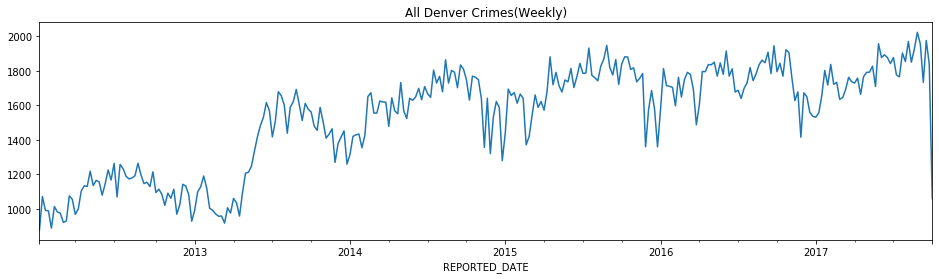

In [109]:
# 주별weekly로 집계된 데이터는 그래프로 표현 하기 적절하다. 
weekly_crimes.plot(figsize=(16,4), title='All Denver Crimes(Weekly)')

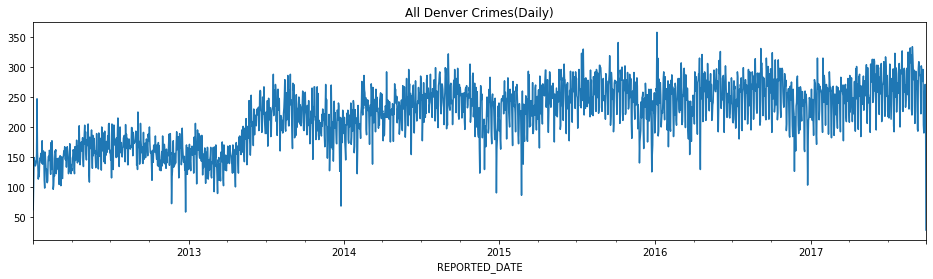

In [110]:
# groupby와 pd.Grouper 객체도 key = 매개변수를 이용해서 컬럼을 지정 할 수 있따. 
daily_crimes = crime.resample('D', on='REPORTED_DATE').size()
daily_crimes.plot(figsize=(16,4), title='All Denver Crimes(Daily)')

# 10.5 Aggregating weekly crime and traffic separately

In [111]:
### [Tech]  시간 리샘플 인덱스(컬럼)과 기존 컬럼의 groupby의 chaining 
### [Goal] 사건 유형별 주별weekly 건수 집계
### [Data] 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format)

## >> How to do it...

In [112]:
# 10.5.1 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format) 으로 부터 
#       REPORT_DATE를  DatetimeIndex로 하여 읽어들여 crime에 저장한다.
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [113]:
crime_sort.head(3)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1


In [114]:
# 10.5.2 분기별 범죄와 교통사고 건수를 구해본다. 
crime_quarterly = crime_sort.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [115]:
# 10.5.3  같은 값에 대해서 인덱스 일자를 분기초로 표현하고 싶다면, offset alias를 'QS'로 한다
crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [116]:
# 10.5.4 값을 검증해본다. 
crime_sort.loc['2012-4-1':'2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [117]:
# 10.5.5 같은 내용을 groupby 를 이용해서 구해본다. 
crime_quarterly2 = crime_sort.groupby(pd.Grouper(freq='Q'))['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly2.equals(crime_quarterly)

True

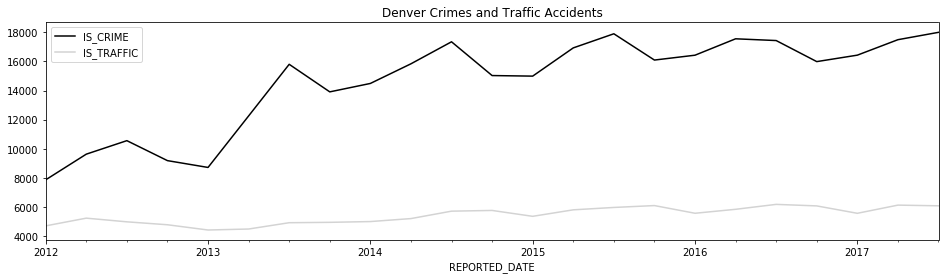

In [118]:
# 10.5.6 그래프로 표현해 본다. 
plot_kwargs = dict(figsize=(16,4), 
                   color=['black', 'lightgrey'], 
                   title='Denver Crimes and Traffic Accidents')
crime_quarterly.plot(**plot_kwargs)

## >> How it works... 10.5

In [119]:
# 특정 컬럼을 지정하지 않으면 모든 수치형 컬럼에 대해서 합계를 구한다.
crime_sort.resample('Q').sum().head()

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,
2012-03-31,-1.313006e+06,496960.237747,7882,4726
2012-06-30,-1.547274e+06,585656.789182,9641,5255
2012-09-30,-1.615835e+06,611604.800384,10566,5003
2012-12-31,-1.458177e+06,551923.040048,9197,4802
2013-03-31,-1.368931e+06,518159.721947,8730,4442


In [120]:
# 3월 시작의 분기로 구하고 싶으면 offset alias를 'QS-MAR'로 한다. 
crime_sort.resample('QS-MAR')['IS_CRIME', 'IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2011-12-01,5013,3198
2012-03-01,9260,4954
2012-06-01,10524,5190
2012-09-01,9450,4777
2012-12-01,9003,4652


## >> There's more... 10.5

In [121]:
# 증가율로 비교하기 위해, 첫 날자를 baseline(기준선)으로 한다. 
crime_begin = crime_quarterly.iloc[0]
crime_begin

IS_CRIME      7882
IS_TRAFFIC    4726
Name: 2012-03-31 00:00:00, dtype: int64

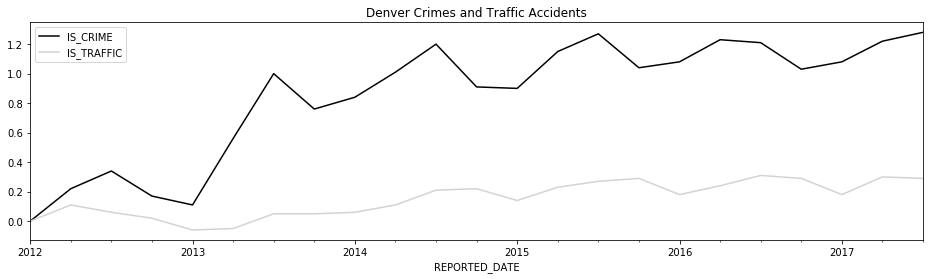

In [122]:
# 기준선 대비 증가율을 그래프로 표현 한다. 
crime_quarterly.div(crime_begin) \
               .sub(1) \
               .round(2) \
               .plot(**plot_kwargs)

# 10.6 Measuring crime by weekday and year

In [123]:
### [Tech] dt 엑세서를 활용하여 요일별 집계를 수행한다. 
### [Goal] 연도별 요일별 집계를 사건 건수를 구해본다. 
### [Data] 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format)

## >> How to do it...

In [124]:
# 10.6.1 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format) 으로 부터 
#      읽어들여 crime에 저장한다.
crime = pd.read_hdf('data/crime.h5', 'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [125]:
# 10.6.2 dt.weekday_name을 이용해서 요일을 구하고, 그 건수를 집계한다. 
wd_counts = crime['REPORTED_DATE'].dt.weekday_name.value_counts()
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

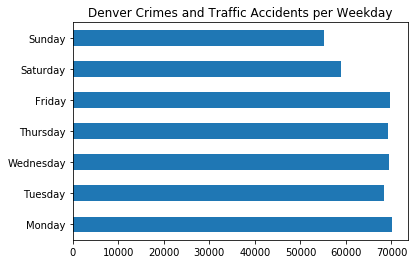

In [126]:
# 10.6.3 인덱스 순서를 많은 순에서 요일 순으로 정리하고, 막대그래프로 표현한다. 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
        'Friday', 'Saturday', 'Sunday']
title = 'Denver Crimes and Traffic Accidents per Weekday'
wd_counts.reindex(days).plot(kind='barh', title=title)

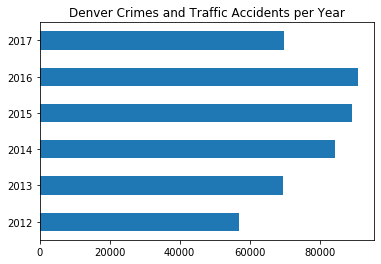

In [127]:
# 10.6.4 dt_year를 이용해서 연도를 추출하고 sort_index로 순서 정리 후, 막대그래프로 표현한다.  
title = 'Denver Crimes and Traffic Accidents per Year' 
crime['REPORTED_DATE'].dt.year.value_counts() \
                              .sort_index() \
                              .plot(kind='barh', title=title)

In [128]:
# 10.6.5 요일별, 연도별 집계를 수행해보다.
#  요일과 연도정보를 각각 Series로 생성한다. 
weekday = crime['REPORTED_DATE'].dt.weekday_name
year = crime['REPORTED_DATE'].dt.year

weekday.head()

0    Sunday
1    Sunday
2    Sunday
3    Sunday
4    Sunday
Name: REPORTED_DATE, dtype: object

In [129]:
# 요일, 연도 Series를 groupby 에 전달해서 (인덱스가 정수형으로 같아서 groupby로 활용가능하다 )
# 연도별 요일별 건수를 집계한다. 
crime_wd_y = crime.groupby([year, weekday]).size()
crime_wd_y.head(10)

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
dtype: int64

In [130]:
# 10.6.6 Unstack을 통해 인지하기 편한 집계표 형태로 변환
crime_table = crime_wd_y.rename_axis(['Year', 'Weekday']).unstack('Weekday')
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [131]:
# 10.6.7 2017년 데이터가 증가하다 멈추어 이상하다.  가장 마지막 날자가 272 번째 날자임을 확인
criteria = crime['REPORTED_DATE'].dt.year == 2017
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max() # 가장 큰 날자

272

In [132]:
# 10.6.8  단순히 환산하면 272일은 0.745의 비중을 차지한다.
round(272 / 365, 3)

0.745

In [133]:
# 혹시 다른 특성이 있을 수도 있으니, 연도별 272일째까지의 범죄 비율을 구해본다. 
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272) \
                                  .groupby(year) \
                                  .mean() \
                                  .round(3)
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [134]:
# 2016년 까지의 비율의 중앙값은 0.748 이다..
crime_pct.loc[2012:2016].median()

0.748

In [135]:
# 10.6.9  2017년도의 값을 0.748로 보정한다. 
crime_table.loc[2017] = crime_table.loc[2017].div(.748).astype('int')
crime_table = crime_table.reindex(columns=days)
crime_table

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


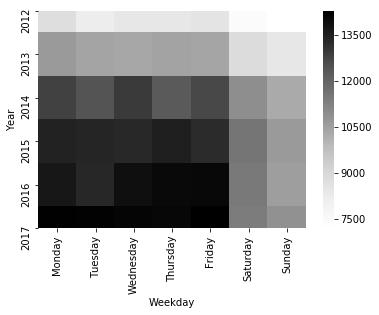

In [136]:
# 10.6.10  표를 직관적으로 이해하기 위해서 heatmap을 그려본다. 
import seaborn as sns
sns.heatmap(crime_table, cmap='Greys');

In [137]:
# 10.6.11 범죄 증가는 인구와 비례한다. 인구 정보로 보정을 수행하기 위해 인구 데이터를 
#   dever_pop으로 Year를  인덱스로 읽어 들인다. 
denver_pop = pd.read_csv('data/denver_pop.csv', index_col='Year')
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


In [138]:
# 10.6.12 10만명당 범죄로 표현할 수 있도록 인구 테이블을 100,000으로 나누고
#       .squeeze() 메소드를 이용해서 Series den_100k를 생성한다. 
den_100k = denver_pop.div(100000).squeeze()
den_100k

Year
2017    7.05
2016    6.93
2015    6.80
2014    6.62
2013    6.47
2012    6.34
Name: Population, dtype: float64

In [139]:
# 10만명당 범죄를 구하기 위한 연산을 수행한다. 
#  crime_table과 den_100k가 같은 연도 인덱스를 갖고,  div의 매개변수로 Series를 지정하고, 
#  axis='index' 를 통해 행방향 연산이 가능하도록 한다. 
crime_table2 = crime_table.div(den_100k, axis='index').astype('int')
crime_table2

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,1385,1291,1331,1331,1348,1173,1133
2013,1642,1609,1600,1612,1604,1371,1305
2014,1935,1879,1955,1859,1915,1654,1552
2015,1978,1967,1958,1987,1951,1703,1562
2016,1978,1924,2005,2027,2028,1654,1522
2017,2017,2015,2005,1999,2024,1614,1540


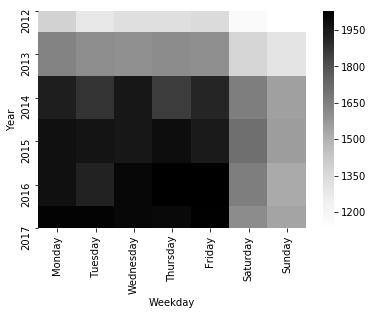

In [140]:
# 10.6.13 다시 heatmap을 그려본다. 인구 증가와 관계 없이 범죄는 증가 추이가 관찰된다. 
sns.heatmap(crime_table2, cmap='Greys')

## >> How it works... 10.6

In [141]:
# 10.6.3 의 요일별 정리는 .reindex 말고, .loc 지정으로도 가능핟. 
wd_counts.loc[days]

Monday       70024
Tuesday      68394
Wednesday    69538
Thursday     69287
Friday       69621
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [142]:
# DataFrame / Series를 수행하면 기본값은 Series를 열방향으로 수행하려 한다. 
#  .div (, axis = 1) 로 원하는 방향의 연산을 수행할 수 있다. 
crime_table / den_100k

,2012,2013,2014,2015,2016,2017,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## >> There's more... 10.6

In [143]:
# 특정 범죄유형에 대해서 연도별 요일별 증가추이 heatmap을 그리는 함수를 작성해보자. 
ADJ_2017 = .748

def count_crime(df, offense_cat): 
    df = df[df['OFFENSE_CATEGORY_ID'] == offense_cat]  # 범죄유형으로 filter
    weekday = df['REPORTED_DATE'].dt.weekday_name  # 요일명 Series
    year = df['REPORTED_DATE'].dt.year   # 연도 Series
    
    ct = df.groupby([year, weekday]).size().unstack()   # 연도별 요일별 집계표 
    ct.loc[2017] = ct.loc[2017].div(ADJ_2017).astype('int') # 2017년 데이터 포인트 부족 보정
    
    pop = pd.read_csv('data/denver_pop.csv', index_col='Year') # 인구 정보 보정
    pop = pop.squeeze().div(100000)        # 10만명당으로 환산
    
    ct = ct.div(pop, axis=0).astype('int')  # 인구로 나눗셈 수행
    ct = ct.reindex(columns=days)           # 요일 순서 정리
    sns.heatmap(ct, cmap='Greys')           # heatmap drawing
    return ct

REPORTED_DATE,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,95,72,72,76,71,78,76
2013,85,74,74,69,65,68,67
2014,94,76,72,70,76,67,67
2015,108,102,89,101,92,85,78
2016,119,102,100,99,97,86,85
2017,114,118,111,106,111,91,102


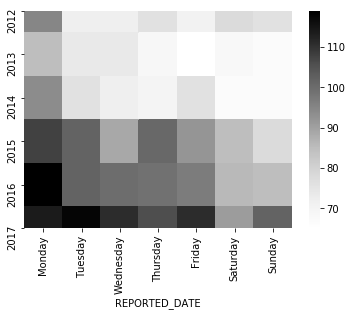

In [144]:
count_crime(crime, 'auto-theft')

# 10.7 Grouping with anonymous functions with a DatetimeIndex

In [145]:
### [Tech] .groupby 의 그룹화 부분을 lambda 함수로 지정해본다. 
###       추가로 .xs 메서드로 임의의 인덱스 레벨의 단일값을 선택한다. 
### [Goal] 연도별 시간대별 범죄 발생 건수를 살펴본다. 
### [Data] 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format)

## >> How to do it...

In [146]:
# 10.7.1 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format) 으로 부터 
#       REPORT_DATE를  DatetimeIndex로 하여 읽어들여 crime에 저장한다.
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()
crime_sort.head(3)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1


In [147]:
# 10.7.2  DatetimeIndex는 pd.Timestamp와 공유하는 속성과 메소드를 갖는다. 
#        (DatetimeIndex는 인덱스로서의 속성메소드와 일시 객체로서의 속성메소드를 갖는다. )
dt_attrs = dir(crime_sort.index)
ts_attrs = dir(pd.Timestamp)
common_attrs = set(dir(crime_sort.index)) & set(dir(pd.Timestamp))
print('DatetimeIndex attribute and methods >> \n',
      [attr for attr in dt_attrs if attr[0] != '_'], 
      len([attr for attr in dt_attrs if attr[0] != '_']))
print('\n\npd.Timestamp attribute and methods >> \n',
      [attr for attr in ts_attrs if attr[0] != '_'], 
      len([attr for attr in ts_attrs if attr[0] != '_']))
print('\n\ncommon attribute and methods >> \n',
      [attr for attr in common_attrs if attr[0] != '_'], 
      len([attr for attr in common_attrs if attr[0] != '_']))

DatetimeIndex attribute and methods >> 
 ['T', 'all', 'any', 'append', 'argmax', 'argmin', 'argsort', 'array', 'asi8', 'asof', 'asof_locs', 'astype', 'ceil', 'contains', 'copy', 'date', 'day', 'day_name', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'delete', 'difference', 'drop', 'drop_duplicates', 'droplevel', 'dropna', 'dtype', 'dtype_str', 'duplicated', 'empty', 'equals', 'factorize', 'fillna', 'floor', 'format', 'freq', 'freqstr', 'get_duplicates', 'get_indexer', 'get_indexer_for', 'get_indexer_non_unique', 'get_level_values', 'get_loc', 'get_slice_bound', 'get_value', 'get_value_maybe_box', 'get_values', 'groupby', 'has_duplicates', 'hasnans', 'holds_integer', 'hour', 'identical', 'indexer_at_time', 'indexer_between_time', 'inferred_freq', 'inferred_type', 'insert', 'intersection', 'is_', 'is_all_dates', 'is_boolean', 'is_categorical', 'is_floating', 'is_integer', 'is_interval', 'is_leap_year', 'is_lexsorted_for_tuple', 'is_mixed', 'is_monotonic', 'is_monotonic_decre

In [148]:
# 10.7.3 DatetimeIndex인 인덱스에 .weekday_name 속성을 이용하면 요일을 구할 수 있다. 
# cf. 10.6.2에서는 np.datetime64 형을 갖는 REPORT_DATE 컬럼에 dt 엑세서를 통해 적용했었다. 
crime_sort.index.weekday_name.value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [149]:
# 10.7.4 .groupby에 그룹화 컬럼에 함수를 적용할 수가 있어, 요일별 범죄 현황을 
#       lamgda 함수로 지정하여 아래 처럼 표기 할 수 있다. 
crime_sort.groupby(lambda x: x.weekday_name)['IS_CRIME', 'IS_TRAFFIC'].sum()

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
Sunday,42315,12968
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


In [150]:
# 10.7.5 컬럼화 할 함수를 2개 병렬해서 전달 할 수도 있다. 
#       lambda함수, 2개를 리스트에 담아 funcs로 지정하고, groupby의 매개변수로 전달 한다. 
funcs = [lambda x: x.round('2h').hour, lambda x: x.year]
cr_group = crime_sort.groupby(funcs)['IS_CRIME', 'IS_TRAFFIC'].sum() #연도별 시간대별 건수
cr_final = cr_group.unstack()  # 연도 unstack하여 분할표 작성
cr_final.style.highlight_max(color='lightgrey') # 최대값 강조
# 범죄는 오후 4시~6시 사이,  교통사고는 오후 6~8시에 가장 많이 발생한다. 

In [151]:
funcs = [lambda x: x.round('2h').hour, lambda x: x.year]
crime_sort.groupby(funcs)['IS_CRIME', 'IS_TRAFFIC'].sum() 

IS_CRIME  IS_TRAFFIC
0  2012      2422         919
   2013      4040         792
   2014      5649         978
   2015      5649        1136
   2016      5377         980
...           ...         ...
22 2013      4318        1330
   2014      5496        1532
   2015      5626        1671
   2016      5637        1472
   2017      4358        1072

[72 rows x 2 columns]

## >> There's more... 10.7

In [152]:
# .xs 메소드를 이용하면, MulitIndex의 임의의 레벨의 레이블 값을 가지고 올 수 있다.
#   컬럼 level 0 에서 'IS_TRAFFIC' 레이블
cr_final.xs('IS_TRAFFIC', axis='columns', level=0).head()

,2012,2013,2014,2015,2016,2017
0,919,792,978,1136,980,782
2,718,652,779,773,718,537
4,399,378,424,471,464,313
6,411,399,479,494,593,462
8,1957,1955,2210,2331,2372,1828


In [153]:
#  2016년도 정보 
cr_final.xs(2016, axis='columns', level=1).head()

,IS_CRIME,IS_TRAFFIC
0,5377,980
2,4091,718
4,3044,464
6,2108,593
8,4488,2372


# 10.8 Grouping by a DatetimeIndex and another column

In [154]:
### [Tech] groupby 함수를 이용해서 datetime 형 컬럼과 일반 컬럼을 함께 그룹화 한다. 
###       다른 컬럼과 시간 단위를 함께 그룹핑 할 때 주의사항으로
###       resample은 문제가 발생 할 수 있다.
### [Goal] 입사연차(10년단위)별 성별 급여수준 비교
### [Data] employee.csv

## >> How to do it...

In [155]:
# 10.8.1 employee.csv로 부터 employee 를 load한다. 
#        입사연차를 활용하기 위해 채용일자 HIRE_DATE를 인덱스로 한다. 
employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['JOB_DATE', 'HIRE_DATE'], 
                       index_col='HIRE_DATE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


In [156]:
# GENDER는 누락값 없이 다 있다. 
employee.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2006-06-12 to 2009-01-12
Data columns (total 9 columns):
UNIQUE_ID            2000 non-null int64
POSITION_TITLE       2000 non-null object
DEPARTMENT           2000 non-null object
BASE_SALARY          1886 non-null float64
RACE                 1965 non-null object
EMPLOYMENT_TYPE      2000 non-null object
GENDER               2000 non-null object
EMPLOYMENT_STATUS    2000 non-null object
JOB_DATE             1997 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 156.2+ KB


In [157]:
# 또 하나의 날자 장보 JOB_DATE
employee[['JOB_DATE']].describe()

,JOB_DATE
count,1997
unique,947
top,2002-01-05 00:00:00
freq,34
first,1980-11-15 00:00:00
last,2016-05-31 00:00:00


In [158]:
# 10.8.2 성별로 급여를 비교한다. 남성이 $5200  높다.
employee.groupby('GENDER')['BASE_SALARY'].mean().round(-2)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

In [159]:
# 10.8.3 offset alias '10AS'를 이용해서 최초 입사자로 부터 10년 단위로 평균 급여를 구한다. 
employee.resample('10AS')['BASE_SALARY'].mean().round(-2)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

In [160]:
# 10.8.4  성병 연차별 급여를 groupby와 resampe을 chain 하여 구해보자.
sal_avg = employee.groupby('GENDER')\
                  .resample('10AS')['BASE_SALARY']\
                  .mean().round(-2)
sal_avg

GENDER  HIRE_DATE 
Female  1975-01-01     51600.0
        1985-01-01     57600.0
        1995-01-01     55500.0
        2005-01-01     51700.0
        2015-01-01     38600.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [161]:
employee.resample('10AS')

In [162]:
# 10.8.5 unstack을 해보면 Gender 별로 어긋나게 연차가 resample 된것을 확인 할 수 있다. 
sal_avg.unstack('GENDER')

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1975-01-01,51600.0,NaN
1978-01-01,NaN,72300.0
1985-01-01,57600.0,NaN
1988-01-01,NaN,64600.0
1995-01-01,55500.0,NaN
1998-01-01,NaN,59700.0
2005-01-01,51700.0,NaN


In [163]:
# 10.8.6 남성 최초 입사일과 여성 최초 입사일이 다른데서 기인한다. 
# 남성 최초는 1958년
employee[employee['GENDER'] == 'Male'].index.min()

Timestamp('1958-12-29 00:00:00')

In [164]:
# 여성 최초는 1975년
employee[employee['GENDER'] == 'Female'].index.min()

Timestamp('1975-06-09 00:00:00')

In [165]:
# 10.8.7 이 문제를 해결하려면 goupby 함수안에서 동시에 그룹화 컬럼으로 지정해 줘야 한다. 
#      시간단위의 grouping은 pd.Grouper 객체를 활용한다. 
sal_avg2 = employee.groupby(['GENDER', pd.Grouper(freq='10AS')])\
                    ['BASE_SALARY'].mean().round(-2)
sal_avg2

GENDER  HIRE_DATE 
Female  1968-01-01         NaN
        1978-01-01     57100.0
        1988-01-01     57100.0
        1998-01-01     54700.0
        2008-01-01     47300.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [166]:
# 10.8.8 unstack을 해보면 같은 주기로 연차가 그룹핑이 되었음을 확인 할 수 있다. 
sal_final = sal_avg2.unstack('GENDER')
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


## >> How it works... 10.8

In [167]:
# 참고로 groupby 후에 resample을 호출 할 수 있다.
'resample' in dir(employee.groupby('GENDER'))

True

In [168]:
# 반대로 resample 호출 후에 groupby 를 호출 할 수는 없다. 
# 그리서 resample을 먼저 할 수는 없다. 
'groupby' in dir(employee.resample('10AS'))

False

## >> There's more... 10.8

In [169]:
# 인덱스 레이블을 보다 명확한 의미가 되도록 변경해보자.

years = sal_final.index.year
years_right = years + 9
sal_final.index = years.astype(str) + '-' + years_right.astype(str)
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-1967,NaN,81200.0
1968-1977,NaN,106500.0
1978-1987,57100.0,72300.0
1988-1997,57100.0,64600.0
1998-2007,54700.0,59700.0
2008-2017,47300.0,47200.0


In [170]:
# 일자시간 전용 메소드를 활용 하는 대신,  pd.cut을 이용해서 유사한 형태를 구할 수 도 있다.  
cuts = pd.cut(employee.index.year, bins=5, precision=0)
cuts.categories.values

IntervalArray([(1958.0, 1970.0], (1970.0, 1981.0], (1981.0, 1993.0], (1993.0, 2004.0], (2004.0, 2016.0]],
              closed='right',
              dtype='interval[float64]')

In [171]:
employee.groupby([cuts, 'GENDER'])['BASE_SALARY'].mean().unstack('GENDER').round(-2)

GENDER,Female,Male
"(1958.0, 1970.0]",NaN,85400.0
"(1970.0, 1981.0]",54400.0,72700.0
"(1981.0, 1993.0]",55700.0,69300.0
"(1993.0, 2004.0]",56500.0,62300.0
"(2004.0, 2016.0]",49100.0,49800.0


# 10.9 Finding the last time crime was 20% lower with merge_asof

In [172]:
"""  pd.merge_asof() """
# 시간 데이터의 경우, 딱 일치하는 값이 아니라 가장 가까운 값, 가까운 값 중 에서 
# 마지막 또는 최초의 값을 검색하는 필요가 발생한다. 
# 이 때, pd.merge_asof() 함수를 사용한다. 
# 두 개의 DataFrame을 병합하는데, 일치 하는 값 대신 가장 가까운 값을 찾는다. 
# 이 때, 두 DataFrame의 연결고리(정렬기준)가 될  key는 정력(sort) 되어 있어야 하며,
#  join 방식 (how)는 left로 고정된다. 
#  마지막 매개변수인 direction에 따라 '가까운'의 정의가 달라진다. 
#       backward(기본값) : left key 값보다 작거나 같은 마지막 값
#       forward   : left key 값보다 크거나 같은 최초 값
#       nearest : left key 값과 같거나 가장 근사한 값

"""
Signature:
pd.merge_asof(
    left,
    right,
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    by=None,
    left_by=None,
    right_by=None,
    suffixes=('_x', '_y'),
    tolerance=None,
    allow_exact_matches=True,
    direction='backward',
)
Docstring:
Perform an asof merge. This is similar to a left-join except that we
match on nearest key rather than equal keys.

Both DataFrames must be sorted by the key.

For each row in the left DataFrame:

  - A "backward" search selects the last row in the right DataFrame whose
    'on' key is less than or equal to the left's key.

  - A "forward" search selects the first row in the right DataFrame whose
    'on' key is greater than or equal to the left's key.

  - A "nearest" search selects the row in the right DataFrame whose 'on'
    key is closest in absolute distance to the left's key.

The default is "backward" and is compatible in versions below 0.20.0.
The direction parameter was added in version 0.20.0 and introduces
"forward" and "nearest".

Optionally match on equivalent keys with 'by' before searching with 'on'.
"""
''

''

In [173]:
### [Tech] pd.merge_asof 함수를 이용해서 조건에 만족하는 마지막(또는 처음) 시점을 찾는다. 
###        pd.Grouper 객체 대신 Period 객체를 이용해서 월별 집계를 수행 할 수 있다. 
### [Goal] 범죄유형 별 ('OFFENSE_CATEGORY_ID') 현 시점보다 20% 범죄가 적었던 시점이 
###        언제인지 찾아본다. 
### [Data] 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format)

In [174]:
###        merge_asof를 사용하기 위해 
###            1. 기준월을 잡고 해당 기준월의 0.8 (=20% less)을 목표값으로 지정한다. 
###            2.  left는 인덱스를 해제하고, left, right 모두 key가 될 컬럼으로 정렬한다. 
###            3.  pd.merge_asof를 통해 20% 적었던 마지막 일자를 구한다.

## >> How to do it...

In [175]:
# 10.9.1 덴버시의 범죄 정보 cremes.h5 (HDF : Hierachical Data Format) 으로 부터 
#       REPORT_DATE를  DatetimeIndex로 하여 읽어들여 crime에 저장한다.
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [176]:
# 10.9.2  월단위의 최근 범죄건수와의 비교이므로 마지막 달이 온전히 31 (30)일 정보인지 확인해본다.
#          마지막 달이 9월 29일로 몇 일 부족해 보인다. 
crime_sort.index.max()

Timestamp('2017-09-29 06:16:00')

In [177]:
# 10.9.3 2017년 8월까지의 데이터만 사용하기로 하고, 마지막 일자를 확인해본다.
crime_sort = crime_sort[:'2017-8']
crime_sort.index.max()

Timestamp('2017-08-31 23:52:00')

In [178]:
crime_sort.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [179]:
# 10.9.4 월별, 범죄유형별OFFENSE_CATEGORY_ID 건수를 집계한 Series를 all_data에 저장한다. 
all_data = crime_sort.groupby([pd.Grouper(freq='M'), 'OFFENSE_CATEGORY_ID']).size()
all_data.tail()

REPORTED_DATE  OFFENSE_CATEGORY_ID     
2017-08-31     robbery                      108
               sexual-assault                57
               theft-from-motor-vehicle     675
               traffic-accident            2126
               white-collar-crime           138
dtype: int64

In [180]:
# 10.9.5 merge_asof의 매개변수로 전달할 DataFrame 이 되도록 
#       all_data의 값으로 정렬하고 Total이라는 컬럼명이 되도록 지정하면서 인덱스를 해제한다.
all_data = all_data.sort_values().reset_index(name='Total')
all_data.tail() # right

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
1014,2016-09-30,traffic-accident,2120
1015,2017-08-31,traffic-accident,2126
1016,2015-10-31,traffic-accident,2156
1017,2016-10-31,traffic-accident,2156
1018,2017-05-31,traffic-accident,2199


In [181]:
# 10.9.6  left DataFrame  goal 의 생성을 위해, all_data의 8월 데이터만 추출하고
#        찾고자 하는 20% 적었던 시점, 즉 현 Total의 0.8 값을 Total_Goal 컬럼으로 저장한다.
#       Total로 정렬되어 있기 때문에, Total_Goal로도 정렬 되어 있다. 
goal = all_data[all_data['REPORTED_DATE'] == '2017-8-31'].reset_index(drop=True)
goal['Total_Goal'] = goal['Total'].mul(.8).astype('int64')
goal.tail() # left

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total,Total_Goal
10,2017-08-31,theft-from-motor-vehicle,675,540
11,2017-08-31,larceny,877,701
12,2017-08-31,public-disorder,878,702
13,2017-08-31,all-other-crimes,1583,1266
14,2017-08-31,traffic-accident,2126,1700


In [182]:
# 10.9.7  left에 goal의 Total_Goal,  right에  all_data의 Total이 
#         left join이 되면서 가장 마지막 (오름차순 정렬 되어 있으므로) 값을 찾는 
#         pd.merge_asof를 수행한다. 
#         by = 'OFFENSE_CATEGORY_ID' 로 범죄유형별로 병합을 수행하고,
#         suffixes = ('_Current','_Last') 로 기준일자와 20%  적었던 마지막 일자를 구분한다 

pd.merge_asof(goal, all_data, left_on='Total_Goal', right_on='Total', 
              by='OFFENSE_CATEGORY_ID', suffixes=('_Current', '_Last'))

,REPORTED_DATE_Current,OFFENSE_CATEGORY_ID,Total_Current,Total_Goal,REPORTED_DATE_Last,Total_Last
0,2017-08-31,murder,7,5,2017-01-31,5
1,2017-08-31,arson,7,5,2012-01-31,5
2,2017-08-31,sexual-assault,57,45,2013-01-31,45
3,2017-08-31,robbery,108,86,2015-03-31,86
4,2017-08-31,white-collar-crime,138,110,2016-10-31,110
5,2017-08-31,aggravated-assault,195,156,2016-05-31,154
6,2017-08-31,other-crimes-against-persons,376,300,2014-04-30,285
7,2017-08-31,burglary,432,345,2012-01-31,343
8,2017-08-31,auto-theft,599,479,2017-07-31,477
9,2017-08-31,drug-alcohol,636,508,2015-05-31,505


## >> There's more... 10.9

In [183]:
# pandas Period 객체를 이용하면 pd.Grouper 객체를 사용하지 않고 기간을 지정 할 수 있다. 

# 아래와 같이 Period 객체를 생성할 수 있다. 
# freq = 'T' 는 분을 가리킨다.  (D:일, W:주,M:월말,Q:분기말,A:연말,H:사간, S:초 등)
pd.Period(year = 2012, month = 5, day = 17 , hour = 14, minute = 20, freq = 'T')

Period('2012-05-17 14:20', 'T')

In [184]:
# Period를 생성하는 .to_period()메소드와 익명함수를 활용해서 pd.Grouper 객체 대신 
#  월단위 grouping이 가능하다. 
# cf.10.9.4
ad_period = crime_sort.groupby([lambda x : x.to_period('M'), 'OFFENSE_CATEGORY_ID']).size()
ad_period.tail()

         OFFENSE_CATEGORY_ID     
2017-08  robbery                      108
         sexual-assault                57
         theft-from-motor-vehicle     675
         traffic-accident            2126
         white-collar-crime           138
dtype: int64

In [185]:
# merge_asof 적용을 위해 정렬하고 인덱스 해제 하고 컬럼명을 정리한다. 
ad_period = ad_period.sort_values()\
                    .reset_index (name = 'Total')\
                    .rename(columns = {'level_0':'REPORT_DATE'})
ad_period

,REPORT_DATE,OFFENSE_CATEGORY_ID,Total
0,2014-12,murder,1
1,2013-01,arson,1
2,2016-05,murder,1
3,2012-12,murder,1
4,2016-12,murder,1
...,...,...,...
1014,2016-09,traffic-accident,2120
1015,2017-08,traffic-accident,2126
1016,2015-10,traffic-accident,2156
1017,2016-10,traffic-accident,2156


In [186]:
# ad_period로 생성한 DataFrame이  10.9.5에서 생성한 all_data와 동일한지 
#  마지막 두 컬럼으로 비교해보면 같음을 알 수 있다. 
cols = ['OFFENSE_CATEGORY_ID', 'Total']
all_data[cols].equals(ad_period[cols])

True

In [187]:
# left가 되는 goal_period를 생성해본다.
# 2017년 8월 주기를 생성하고 이를 이용해서 goal_period를 추출한다. 
aug_2017 = pd.Period ('2017-8', freq = 'M')
goal_period = ad_period[ad_period['REPORT_DATE']==aug_2017]\
                .reset_index (drop = True)      # 2017년 8월 정보 추출

# 목표값 'Total_Goal'설정
goal_period['Total_Goal'] = goal_period['Total'].mul(.8).astype('int64') 

# merge_asof 수행을 통해 범죄유형 별 마지막으로 현재보다 20% 범죄가 낮았던 시점을 구함
pd.merge_asof(goal_period, ad_period, left_on = 'Total_Goal', 
             right_on = 'Total', by = 'OFFENSE_CATEGORY_ID',
             suffixes = ('_Current', '_Last'))

,REPORT_DATE_Current,OFFENSE_CATEGORY_ID,Total_Current,Total_Goal,REPORT_DATE_Last,Total_Last
0,2017-08,murder,7,5,2017-01,5
1,2017-08,arson,7,5,2012-01,5
2,2017-08,sexual-assault,57,45,2013-01,45
3,2017-08,robbery,108,86,2015-03,86
4,2017-08,white-collar-crime,138,110,2016-10,110
5,2017-08,aggravated-assault,195,156,2016-05,154
6,2017-08,other-crimes-against-persons,376,300,2014-04,285
7,2017-08,burglary,432,345,2012-01,343
8,2017-08,auto-theft,599,479,2017-07,477
9,2017-08,drug-alcohol,636,508,2015-05,505
